<a href="https://colab.research.google.com/github/monjjjjj/stockprice_prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
training_set = pd.read_csv('Starbucks_Stock_2017_2021.csv')
training_set.head()

,Date,Open,High,Low,Close/Last,Volume
0,12/31/2021,115.67,117.48,115.60,116.97,3674938.0
1,12/30/2021,116.38,117.34,116.08,116.24,4068918.0
2,12/29/2021,115.40,116.96,115.31,116.38,4215460.0
3,12/28/2021,114.00,116.28,113.81,115.57,4562965.0
4,12/27/2021,112.60,114.37,112.39,114.22,3717026.0


In [ ]:
#training_set = training_set.iloc[:, 1:2].values
#print(training_set)
#print(len(training_set))

[[115.67]
 [116.38]
 [115.4 ]
 ...
 [ 56.08]
 [ 55.56]
 [ 55.91]]
1259


In [ ]:
training_set = training_set.iloc[:, 1:2].values

scaler = MinMaxScaler()
training_set = scaler.fit_transform(training_set)

X_train = training_set[0:1258]
y_train = training_set[1:1259]
X_train = np.reshape(X_train, (1258, 1, 1))



In [ ]:
model = Sequential()
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, batch_size = 4, epochs = 100)
test_set = pd.read_csv('Starbucks_Stock_2022_test.csv')
real_stock_price = test_set.iloc[:,1:2].values
inputs = real_stock_price
inputs = scaler.transform(inputs)
inputs = np.reshape(inputs, (10, 1, 1))
predicted_stock_price = model.predict(inputs)

predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

Epoch 1/100
315/315 [==============================] - 3s 5ms/step - loss: 0.5695
Epoch 2/100
315/315 [==============================] - 2s 5ms/step - loss: 0.1132
Epoch 3/100
315/315 [==============================] - 2s 5ms/step - loss: 0.0579
Epoch 4/100
315/315 [==============================] - 2s 5ms/step - loss: 0.0515
Epoch 5/100
315/315 [==============================] - 2s 5ms/step - loss: 0.0472
Epoch 6/100
315/315 [==============================] - 1s 5ms/step - loss: 0.0422
Epoch 7/100
315/315 [==============================] - 2s 5ms/step - loss: 0.0365
Epoch 8/100
315/315 [==============================] - 1s 5ms/step - loss: 0.0304
Epoch 9/100
315/315 [==============================] - 1s 5ms/step - loss: 0.0239
Epoch 10/100
315/315 [==============================] - 2s 5ms/step - loss: 0.0176
Epoch 11/100
315/315 [==============================] - 2s 5ms/step - loss: 0.0120
Epoch 12/100
315/315 [==============================] - 2s 5ms/step - loss: 0.0074
Epoch 13/100


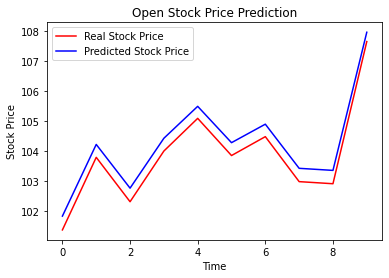

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Open Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

40/40 [==============================] - 0s 2ms/step


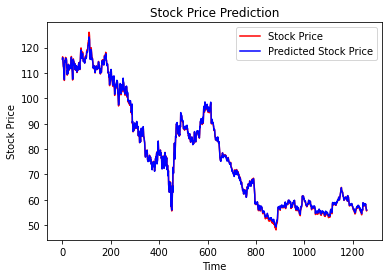

In [ ]:
# Making predictions for the entire dataset
# Getting the real stock price of 2017 - 2021
real_stock_price_train = pd.read_csv('Starbucks_Stock_2017_2021.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2017 - 2021
predicted_stock_price_train = model.predict(X_train)
predicted_stock_price_train = scaler.inverse_transform(predicted_stock_price_train)

# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))